The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of P(xi|y)

## Gaussian Naive Bayes

In [57]:
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
from sklearn.naive_bayes import GaussianNB

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [64]:
X, y = load_iris(return_X_y = True)

### Grafico

In [65]:
sepal_length, sepal_width, petal_length, petal_width = X[:,0], X[:,1], X[:,2], X[:,3]

In [70]:
# y = pd.DataFrame(y)
#y.loc[:,0] = y.loc[:,0].replace([0,1,2], ['Setosa','Versicolour','Virginica'])

C:\Users\agust\AppData\Local\Temp\ipykernel_24740\2616129516.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(y, loc="upper right", labels = ['Setosa','Versicolour','Virginica']


<function matplotlib.pyplot.show(close=None, block=None)>

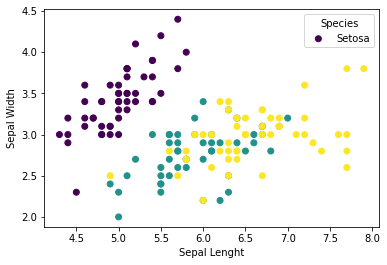

In [105]:
#colors = {'0' : 'r', '1' : 'b', '2' : 'g'}
species = {0: 'Setosa', 1: 'Versicolour', 2:'Virginica'}
fig, ax = plt.subplots()
ax.scatter(sepal_length, sepal_width, c = y)
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.legend(y, loc="upper right", labels = ['Setosa','Versicolour','Virginica']
           ,title = 'Species')
plt.show

### Sigo con gaussian naive bayes

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [107]:
gnb = GaussianNB()

In [108]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [109]:
print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


# Dataset de clase

In [142]:
import pandas as pd
import seaborn as sns

In [144]:
#Primero copiamos el link del repositorio
#Recordar abrir el dataset en el formato raw en GitHub
link_train = 'https://raw.githubusercontent.com/lab-pep-itba/Clase-3---Clasificadores-Bayesianos/master/data/alturas-pesos-mils-train.csv'
link_test = 'https://raw.githubusercontent.com/lab-pep-itba/Clase-3---Clasificadores-Bayesianos/master/data/alturas-pesos-mils-test.csv'

In [127]:
df_train = pd.read_csv(link_train)

In [130]:
df_test = pd.read_csv(link_test)

In [136]:
print(df_train.shape, df_test.shape)

(8000, 4) (2000, 4)


In [137]:
df_train.head()

,Unnamed: 0,Genero,Peso,Altura
0,7620,Mujer,61.235,162.402
1,1837,Hombre,97.432,181.908
2,3311,Hombre,73.324,172.459
3,9478,Mujer,55.193,157.748
4,7805,Mujer,56.886,151.798


C:\Users\agust\anaconda3\envs\CursoDeepLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Peso', ylabel='Altura'>

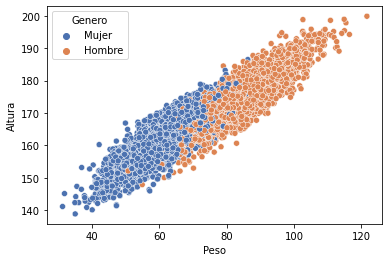

In [146]:
sns.scatterplot(df_train['Peso'], df_train['Altura'], hue = df_train['Genero'], palette = 'deep')

### Gaussian Naive Bayes

In [147]:
gnb_clase = GaussianNB()

In [163]:
X_train_clase, y_train_clase = df_train[['Peso', 'Altura']], df_train['Genero']

In [165]:
X_test_clase, y_test_clase = df_test[['Peso', 'Altura']], df_test['Genero']

In [168]:
y_pred_clase = gnb_clase.fit(X_train_clase, y_train_clase).predict(X_test_clase)

In [169]:
print("Number of mislabeled points out of a total %d points : %d"
    % (X_test_clase.shape[0], (y_test_clase != y_pred_clase).sum()))

Number of mislabeled points out of a total 2000 points : 226


In [178]:
# Accuracy
gnb_clase.score(X_test_clase, y_test_clase)

0.887

In [171]:
# Grafico los puntos mal clasificados

lista_acierto = []

for i in range(len(y_pred_clase)):
    if y_test_clase[i] == y_pred_clase[i]:
        lista_acierto.append('acierto')
    else:
        lista_acierto.append('desacierto')

<AxesSubplot:xlabel='Peso', ylabel='Altura'>

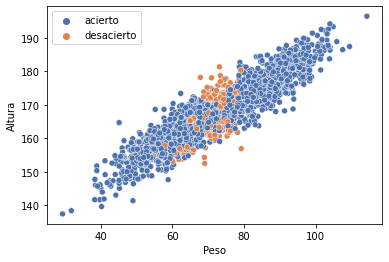

In [174]:
sns.scatterplot(df_test['Peso'], df_test['Altura'], hue = lista_acierto, palette = 'deep')